In [1]:
import csv
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from os.path import dirname, join as pjoin
from scipy.io import loadmat

In [2]:
file_name = r'C:\Users\44788\Desktop\OctaveML\machine-learning-ex4\ex4\ex4data1.mat'
mat_data = loadmat(file_name)

In [3]:
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
X = mat_data['X']; y = mat_data['y']

In [5]:
print(X.shape[0], 'training examples', X.shape[1], 'parameters')

5000 training examples 400 parameters


In [6]:
print(y.shape, 'dimension vector')

(5000, 1) dimension vector


In [7]:
Y = []
for element in y:
    if element == 1:
        Y.append([1,0,0,0,0,0,0,0,0,0])
    if element == 2:
        Y.append([0,1,0,0,0,0,0,0,0,0])
    if element == 3:
        Y.append([0,0,1,0,0,0,0,0,0,0])
    if element == 4:
        Y.append([0,0,0,1,0,0,0,0,0,0])
    if element == 5:
        Y.append([0,0,0,0,1,0,0,0,0,0])
    if element == 6:
        Y.append([0,0,0,0,0,1,0,0,0,0])
    if element == 7:
        Y.append([0,0,0,0,0,0,1,0,0,0])
    if element == 8:
        Y.append([0,0,0,0,0,0,0,1,0,0])
    if element == 9:
        Y.append([0,0,0,0,0,0,0,0,1,0])
    if element == 10:
        Y.append([0,0,0,0,0,0,0,0,0,1])
Y = np.array(Y)

In [8]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z))) 

In [9]:
def softmax(z):
    z_x = np.exp(z - np.max(z))
    return z_x / np.sum(z_x)

In [10]:
def Relu(z):
    return np.maximum(0, z)

In [11]:
def initialize_weights_biases(rows, columns):
    return np.random.randn(rows, columns) * np.sqrt(2/columns), np.zeros(shape=(rows, 1))

In [12]:
def compute_cost(A4, Y):
    m = Y.shape[1]
    cost = -1/m * np.sum(Y * np.log(A4) + (1-Y) * np.log(1-A4))
    cost = np.squeeze(cost)      
    return cost

In [13]:
W1,b1 = initialize_weights_biases(100, 400)
W2,b2 = initialize_weights_biases(50, 100)
W3,b3 = initialize_weights_biases(10, 50)
W4,b4 = initialize_weights_biases(10, 10)

In [14]:
def forprop(W, A, b):
    return np.dot(W, A) + b

In [15]:
def forward_propogation(X,W1,b1,W2,b2,W3,b3,W4,b4):
    z1 = forprop(W1, X, b1)
    A1 = Relu(z1)
    z2 = forprop(W2, A1, b2)
    A2 = Relu(z2)
    z3 = forprop(W3, A2, b3)
    A3 = Relu(z3)
    z4 = forprop(W4, A3, b4)
    A4 = sigmoid(z4)
    #A4 = softmax(z4)
    return A4, A3, A2, A1

In [16]:
def backprop(W3, dZ3, A2, A1, W2, lambd, m):
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T) + lambd / m * W2
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    return dZ2, dW2, db2

In [17]:
def backward_propogation(Y, A4, A3, A2, A1, lambd, m):
    dZ4 = A4 - Y
    dW4 = 1./m * np.dot(dZ4, A3.T) + lambd / m * W4
    db4 = 1./m * np.sum(dZ4, axis=1, keepdims = True)
    dZ3, dW3, db3 = backprop(W4, dZ4, A3, A2, W3, lambd, m)
    dZ2, dW2, db2 = backprop(W3, dZ3, A2, A1, W2, lambd, m)
    dZ1, dW1, db1 = backprop(W2, dZ2, A1, X.T, W1, lambd, m)
    return dW4, db4, dW3, db3, dW2, db2, dW1, db1

In [18]:
def upparam(W, dW, b, db, learning_rate):
    W -= learning_rate * dW
    b -= learning_rate * db
    return W, b

In [19]:
def update_parameters(dW4, W4, db4, b4, dW3, W3, db3, b3, dW2, W2, db2, b2, dW1, W1, db1, b1, learning_rate):
    W4, b4 = upparam(W4, dW4, b4, db4, learning_rate)
    W3, b3 = upparam(W3, dW3, b3, db3, learning_rate)
    W2, b2 = upparam(W2, dW2, b2, db2, learning_rate)
    W1, b1 = upparam(W1, dW1, b1, db1, learning_rate)
    return W1, b1, W2, b2, W3, b3, W4, b4

In [20]:
def test_accuracy(A4, Y, m):
    correct_counter = 0
    prediction = []
    for ele1, ele2 in zip(A4.T, Y.T):
        pred = list(ele1).index((max(ele1)))
        data = list(ele2).index((max(ele2)))
        prediction.append([pred, data])
        if pred == data:
            correct_counter +=1
    return correct_counter/m * 100, prediction

In [21]:
def Neural_network(X, Y, W1, b1, W2, b2, W3, b3, W4, b4, learning_rate, number_iters, lambd, m):
    costs = []
    for i in range(number_iters):
        A4, A3, A2, A1 = forward_propogation(X,W1,b1,W2,b2,W3,b3,W4,b4)
        costs.append(compute_cost(A4, Y))
        dW4, db4, dW3, db3, dW2, db2, dW1, db1 = backward_propogation(Y, A4, A3, A2, A1, lambd, m)
        W1, b1, W2, b2, W3, b3, W4, b4 = update_parameters(dW4, W4, db4, b4, dW3, W3, db3, b3, dW2, W2, db2, b2, dW1, W1, db1, b1, learning_rate)
        if i%10 == 0:
            print('current iteration', i, 'cost:', compute_cost(A4, Y), 'accuracy:', test_accuracy(A4, Y, m)[0])
    accuracy_score, prediction = test_accuracy(A4, Y, m)
    return W1, b1, W2, b2, W3, b3, W4, b4, costs, accuracy_score, prediction, A4

In [22]:
W1, b1, W2, b2, W3, b3, W4, b4, costs, accuracy_score, prediction, A4 = Neural_network(X.T, Y.T, W1, b1, W2, b2, W3, b3, W4, b4, 0.003, 7000, 0.000001, X.shape[0])

current iteration 0 cost: 7.9082360915309895 accuracy: 12.16
current iteration 10 cost: 6.954710646347089 accuracy: 15.4
current iteration 20 cost: 6.63511247998017 accuracy: 12.520000000000001
current iteration 30 cost: 6.4126482809607035 accuracy: 10.4
current iteration 40 cost: 6.229735384963153 accuracy: 9.3
current iteration 50 cost: 6.067151012852843 accuracy: 8.64
current iteration 60 cost: 5.914063466912281 accuracy: 8.3
current iteration 70 cost: 5.763184621218241 accuracy: 8.260000000000002
current iteration 80 cost: 5.608106648859956 accuracy: 8.200000000000001
current iteration 90 cost: 5.44494039870465 accuracy: 8.200000000000001
current iteration 100 cost: 5.270571366477235 accuracy: 8.44
current iteration 110 cost: 5.083019956392561 accuracy: 8.84
current iteration 120 cost: 4.881858070705872 accuracy: 9.06
current iteration 130 cost: 4.670088248288798 accuracy: 9.62
current iteration 140 cost: 4.452356866273343 accuracy: 10.0
current iteration 150 cost: 4.23531037359527

Text(0.5, 0, 'number of iterations')

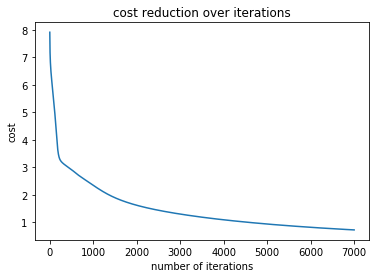

In [23]:
plt.plot(range(0,len(costs)), costs)
plt.title('cost reduction over iterations')
plt.ylabel('cost')
plt.xlabel('number of iterations')